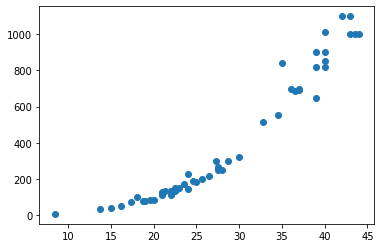

In [4]:
import matplotlib.pyplot as plt
import pickle

f = open('perch.dat', 'rb')
perch = pickle.load(f)
f.close()

length = perch[0]
weight = perch[1]

plt.scatter(length, weight)

In [6]:
len(length)

56

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 선형회귀

# K 최근접 이웃 회귀 : 96%

length = length.reshape(56, 1)

train_input, test_input, train_target, test_target = train_test_split(length, weight, test_size = 0.2)

lr = LinearRegression() # 모델 생성
lr.fit(train_input, train_target) # 학습 // 선을 찾았다. // 기울기, 절편
lr.score(test_input, test_target) # 평가

0.8966386266832267

In [8]:
lr.coef_

array([37.85621432])

In [9]:
lr.intercept_

-669.205638245734

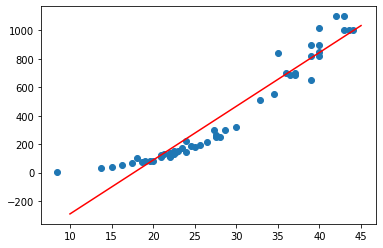

In [10]:
plt.scatter(length, weight)
plt.plot(range(10, 46), lr.coef_ * range(10, 46) + lr.intercept_, 'red')

In [11]:
lr.predict([[100]])

array([3116.41579363])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

# 이상치
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target)

0.9

In [20]:
knn.predict(test_scaled)

array([2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1,
       1, 2, 1, 2, 0, 2, 2, 0])

In [21]:
test_target

array([2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1,
       1, 2, 1, 2, 0, 2, 2, 0])

In [22]:
knn.predict_proba(test_scaled)

array([[0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.

In [23]:
from sklearn.linear_model import LogisticRegression # 분류

lr = LogisticRegression() 
lr.fit(train_scaled, train_target)
lr.score(test_scaled, test_target)

0.8666666666666667

In [24]:
lr.predict_proba(test_scaled)

array([[9.11316167e-05, 5.48771820e-02, 9.45031686e-01],
       [1.62899518e-03, 4.49206797e-01, 5.49164208e-01],
       [4.82877260e-03, 9.66331617e-01, 2.88396101e-02],
       [1.14844686e-02, 7.78244122e-01, 2.10271409e-01],
       [2.32890023e-03, 4.57587876e-01, 5.40083224e-01],
       [1.21452545e-03, 5.16376243e-01, 4.82409231e-01],
       [1.35997163e-02, 3.88179139e-01, 5.98221145e-01],
       [1.16161985e-02, 8.87047334e-01, 1.01336467e-01],
       [9.77189332e-04, 1.81192464e-01, 8.17830347e-01],
       [9.82517539e-01, 1.74820443e-02, 4.16461855e-07],
       [3.88743806e-03, 3.48033958e-01, 6.48078604e-01],
       [1.42437747e-02, 7.38954513e-01, 2.46801712e-01],
       [9.73356409e-01, 2.66425780e-02, 1.01316557e-06],
       [5.49635825e-03, 3.71066367e-01, 6.23437275e-01],
       [2.34482971e-05, 1.04433858e-01, 8.95542694e-01],
       [1.74544007e-02, 8.88321902e-01, 9.42236973e-02],
       [2.26955912e-02, 8.86080120e-01, 9.12242893e-02],
       [9.53875239e-01, 4.61237

In [25]:
# 트리기반 : 성능 굿 // 표준화가 필요가 없다. // 데이터의 설명력 가실 수 있다.
# 결정트리 : 스무고개

from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
dt.score(test_input, test_target)

1.0

[Text(0.36363636363636365, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [43, 40, 37]'),
 Text(0.2727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.45454545454545453, 0.7857142857142857, 'petal length (cm) <= 4.85\ngini = 0.499\nsamples = 77\nvalue = [0, 40, 37]'),
 Text(0.18181818181818182, 0.6428571428571429, 'petal width (cm) <= 1.7\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.2727272727272727, 0.5, 'sepal width (cm) <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.36363636363636365, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.7272727272727273, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(0.6363636363636364, 0.5, '

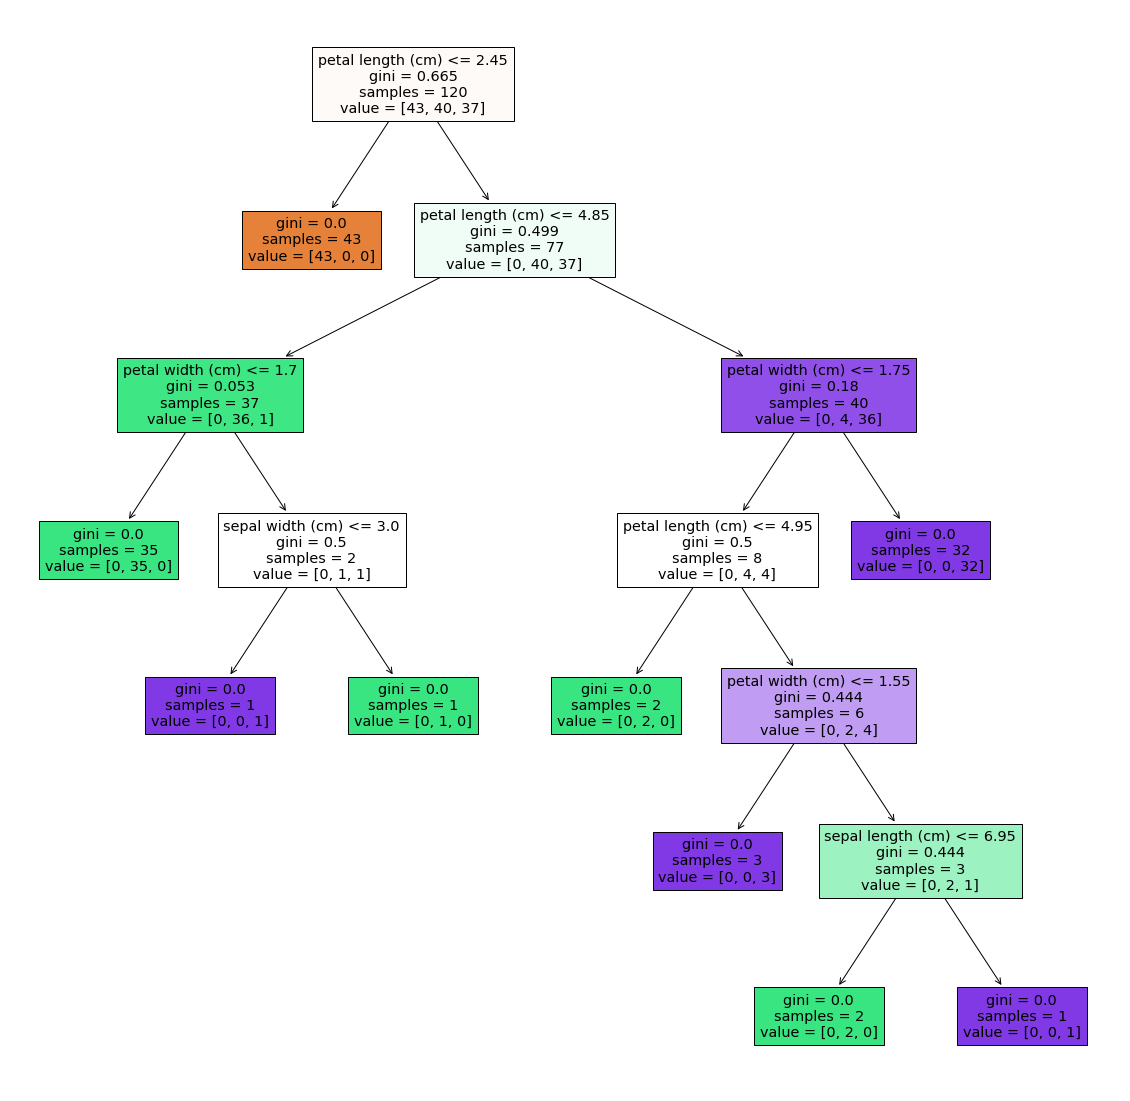

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 20))
plot_tree(dt, feature_names=iris['feature_names'], filled=True)

In [ ]:
# 선형 회귀, 결정 트리 // 과하게 학습 // 과대적합

In [32]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine-date")
# 0이면 레드와인, 1이면 화이트와인
data = wine.iloc[:, :-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

In [33]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

In [37]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(train_input, train_target)
dt.score(test_input, test_target)

0.8730769230769231

[Text(0.5903162323750893, 0.9791666666666666, 'X[1] <= 4.05\ngini = 0.37\nsamples = 5197\nvalue = [1272, 3925]'),
 Text(0.27861132603012156, 0.9375, 'X[1] <= 1.625\ngini = 0.484\nsamples = 2835\nvalue = [1164, 1671]'),
 Text(0.05396965498748659, 0.8958333333333334, 'X[1] <= 1.375\ngini = 0.191\nsamples = 1028\nvalue = [110, 918]'),
 Text(0.007150518412584912, 0.8541666666666666, 'X[2] <= 3.85\ngini = 0.045\nsamples = 522\nvalue = [12, 510]'),
 Text(0.00572041473006793, 0.8125, 'X[2] <= 2.895\ngini = 0.034\nsamples = 519\nvalue = [9, 510]'),
 Text(0.002860207365033965, 0.7708333333333334, 'X[0] <= 12.35\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.0014301036825169824, 0.7291666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.004290311047550947, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.008580622095101895, 0.7708333333333334, 'X[2] <= 3.195\ngini = 0.027\nsamples = 511\nvalue = [7, 504]'),
 Text(0.007150518412584912, 0.7291666666666666

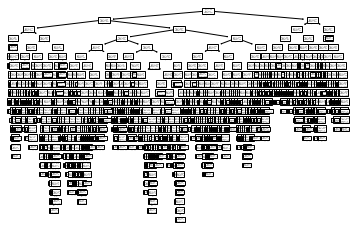

In [36]:
plot_tree(dt)

In [40]:
# 랜덤포레스트 : 트리기반 // 결정트리랑 똑같다. // 결정트리보다 좋을 수 밖에 없다.
# 결정트리 여러개(다 시작점이 다름) : 잘 분류된 나뭇가지들만 가져와서 사용

# 랜덤포레스트 : 훈련세트랑 시험세트 안나눠도됌

# 트리 기반 : 범위를 벗어난 값은 예측X

from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트회귀

rf = RandomForestClassifier(oob_score=True) # 선택받지 못한 데이터로 평가하겠다.
rf.fit(data, target)
rf.oob_score_

0.9054948437740495

In [44]:
# Mozilla/5.0 (Macintosh; Intel Mac OS X 12_5_1)

import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm

dic = {'User-Agent' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_5_1)"}

total = []
for n in tqdm(range(1, 659)):
    url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page={}".format(n), headers = dic)
    html = BeautifulSoup(url.text)
    table = html.find('table')
    table = pd.read_html(str(table))[0].dropna()
    total.append(table)
    time.sleep(1)

100%|██████████| 658/658 [17:17<00:00,  1.58s/it]


In [49]:
samsung = pd.concat(total, ignore_index=True)
samsung = samsung[::-1]
samsung

,날짜,종가,전일비,시가,고가,저가,거래량
6573,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
6572,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
6571,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
6570,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
6569,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
4,2022.08.25,59700.0,700.0,59200.0,59700.0,59000.0,5767902.0
3,2022.08.26,60000.0,300.0,60300.0,60900.0,59900.0,9499995.0
2,2022.08.29,58600.0,1400.0,58700.0,58900.0,58600.0,9841329.0
1,2022.08.30,58800.0,200.0,58700.0,59000.0,58300.0,9690044.0


In [52]:
samsung.index = range(len(samsung))
samsung

,날짜,종가,전일비,시가,고가,저가,거래량
0,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
6569,2022.08.25,59700.0,700.0,59200.0,59700.0,59000.0,5767902.0
6570,2022.08.26,60000.0,300.0,60300.0,60900.0,59900.0,9499995.0
6571,2022.08.29,58600.0,1400.0,58700.0,58900.0,58600.0,9841329.0
6572,2022.08.30,58800.0,200.0,58700.0,59000.0,58300.0,9690044.0


In [69]:
samsung['날짜'] = pd.to_datetime(samsung['날짜'])
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6574 non-null   datetime64[ns]
 1   종가      6574 non-null   float64       
 2   시가      6574 non-null   float64       
 3   고가      6574 non-null   float64       
 4   저가      6574 non-null   float64       
 5   거래량     6574 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 308.3 KB


In [71]:
train = samsung[samsung['날짜'].dt.year != 2022]
test = samsung[samsung['날짜'].dt.year == 2022]

In [55]:
del samsung['전일비']
samsung

,날짜,종가,시가,고가,저가,거래량
0,1996.06.25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6569,2022.08.25,59700.0,59200.0,59700.0,59000.0,5767902.0
6570,2022.08.26,60000.0,60300.0,60900.0,59900.0,9499995.0
6571,2022.08.29,58600.0,58700.0,58900.0,58600.0,9841329.0
6572,2022.08.30,58800.0,58700.0,59000.0,58300.0,9690044.0


In [72]:
data = []
target = []
for i in range(len(train) - 1):
    a = list(train.iloc[i, 1:])
    b = train.iloc[i+1, 1]
    data.append(a)
    target.append(b)

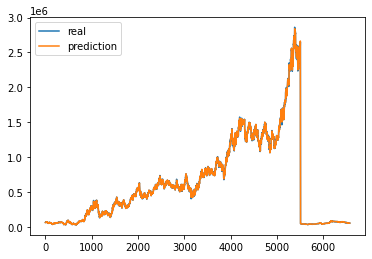

In [65]:
plt.plot(target)
plt.plot(pred)
plt.legend(['real', 'prediction'])

In [73]:
from random import Random
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(data, target)

RandomForestRegressor()

In [63]:
pred = rf.predict(data)
pred

array([67420., 67019., 67796., ..., 58999., 58620., 58750.])

In [67]:
rf.predict([[58800.0,58200.0,58900.0,58200.0,4097314.0]])

array([58975.])

In [74]:
data = []
target = []
for i in range(len(test) - 1):
    a = list(test.iloc[i, 1:])
    b = test.iloc[i+1, 1]
    data.append(a)
    target.append(b)

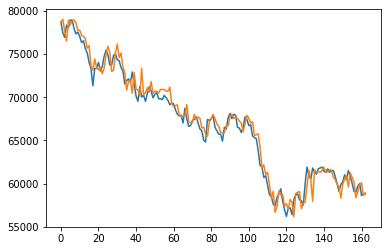

In [76]:
plt.plot(target)
plt.plot(rf.predict(data))

In [77]:
rf.predict([[58800.0,58200.0,58900.0,58200.0,4097314.0]])

array([58701.])

In [79]:
df = pd.read_csv("시간별 태양광 인버터 발전량 데이터.csv", encoding='euc-kr')
df

,발전기명,년월일,설비용량(MW),01시,02시,03시,04시,05시,06시,07시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,영암에프원태양광b,2017-01-01,13.296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7344000.0,5155200.0,2131200.0,134400.0,0.0,0.0,0.0,0.0,0.0,0.0
1,영암에프원태양광b,2017-01-02,13.296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6355200.0,4512000.0,1584000.0,76800.0,0.0,0.0,0.0,0.0,0.0,0.0
2,영암에프원태양광b,2017-01-03,13.296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7411200.0,5356800.0,2332800.0,163200.0,0.0,0.0,0.0,0.0,0.0,0.0
3,영암에프원태양광b,2017-01-04,13.296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4752000.0,3427200.0,1440000.0,67200.0,0.0,0.0,0.0,0.0,0.0,0.0
4,영암에프원태양광b,2017-01-05,13.296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1027200.0,969600.0,460800.0,38400.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,안산연성정수장태양광,2021-08-27,1.490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110400.0,82800.0,51600.0,24000.0,3600.0,0.0,0.0,0.0,0.0,0.0
5103,안산연성정수장태양광,2021-08-28,1.490,0.0,0.0,0.0,0.0,0.0,0.0,22800.0,...,679200.0,433200.0,261600.0,114000.0,24000.0,0.0,0.0,0.0,0.0,0.0
5104,안산연성정수장태양광,2021-08-29,1.490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,519600.0,313200.0,262800.0,84000.0,18000.0,0.0,0.0,0.0,0.0,0.0
5105,안산연성정수장태양광,2021-08-30,1.490,0.0,0.0,0.0,0.0,0.0,0.0,10800.0,...,379200.0,330000.0,248400.0,120000.0,14400.0,0.0,0.0,0.0,0.0,0.0


In [81]:
np.unique(df['발전기명'], return_counts = True)

(array(['세종시폐기물매립장태양광', '안산연성정수장태양광', '영암에프원태양광b'], dtype=object),
 array([1699, 1704, 1704]))

In [87]:
sample1 = df[df['발전기명'] == '영암에프원태양광b']
sample2 = df[df['발전기명'] == '안산연성정수장태양광']
sample3 = df[df['발전기명'] == '세종시폐기물매립장태양광']

sample1 = sample1.interpolate()
sample2 = sample2.interpolate()
sample3 = sample3.interpolate()

data = []
target = []

for i in range(len(sample1) - 1):
    a = list(sample1.iloc[i, 2:])
    b = sample1.iloc[i+1, 17]
    data.append(a)
    target.append(b)

for i in range(len(sample2) - 1):
    a = list(sample2.iloc[i, 2:])
    b = sample2.iloc[i+1, 17]
    data.append(a)
    target.append(b)

for i in range(len(sample3) - 1):
    a = list(sample3.iloc[i, 2:])
    b = sample3.iloc[i+1, 17]
    data.append(a)
    target.append(b)

data = np.array(data)
target = np.array(target)

In [85]:
data.shape

(5104, 25)

In [88]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

rf = RandomForestRegressor()
rf.fit(train_input, train_target)
rf.score(test_input, test_target)

0.7165765057425917

In [89]:
# 비지도 학습 : 문제집

fruits = np.load("fruits_300.npy")
fruits.shape # 300개의 사진 가로 100 세로 100

(300, 100, 100)

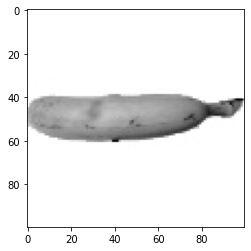

In [94]:
# 사과100, 파인애플100, 바나나100
plt.imshow(fruits[200], cmap = 'gray_r')

In [96]:
# KMeans : 데이터 : 2차원 행렬

fruits2 = fruits.reshape(300, 10000)
fruits2.shape

(300, 10000)

In [99]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits2)

KMeans(n_clusters=3)

In [101]:
target = km.labels_
target

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

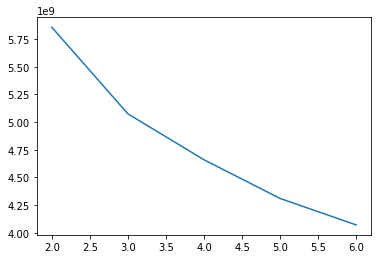

In [102]:
# 시뮬레이션

# 2개 : 거리의 제곱합이 : ???
# 3개 : 거리의 제곱합 : ???

box = []
for n in range(2, 7):
    km = KMeans(n_clusters=n)
    km.fit(fruits2)
    box.append(km.inertia_) # 중심과 데이터 사이의 거리의 제곱합

plt.plot(range(2,7), box)

In [104]:
# 인공신경망

data = wine.iloc[:, :-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

In [106]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [119]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input) # 평균과 표준편차를 구하고 처리해서 넣어라
test_scaled = ss.transform(test_input) # 학습했던 평균과 표준편차를 가지고 처리해서 넣어라

model = keras.Sequential() # 인공신경망을 설계하기위한 도화지
model.add(keras.layers.Dense(4, activation = 'relu', input_shape = (3, )))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

# 연속으로 30회 이상 좋아지지않으면 학습을 종료시킨다. 마지막 30회는 무효로 친다.
es = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

# 어떻게 학습할건지
model.compile(loss = 'binary_crossentropy', metrics = 'accuracy')

hist = model.fit(train_scaled, train_target, epochs = 1000000, validation_data=(test_scaled, test_target),
                 callbacks = [es])

Epoch 1/1000000
163/163 [==============================] - 1s 3ms/step - loss: 0.5958 - accuracy: 0.7345 - val_loss: 0.5106 - val_accuracy: 0.7615
Epoch 2/1000000
163/163 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7520 - val_loss: 0.4463 - val_accuracy: 0.7615
Epoch 3/1000000
163/163 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.7520 - val_loss: 0.4243 - val_accuracy: 0.7615
Epoch 4/1000000
163/163 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7520 - val_loss: 0.4160 - val_accuracy: 0.7615
Epoch 5/1000000
163/163 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.7520 - val_loss: 0.4121 - val_accuracy: 0.7615
Epoch 6/1000000
163/163 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.7772 - val_loss: 0.4099 - val_accuracy: 0.7977
Epoch 7/1000000
163/163 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.7945 - val_loss: 0

In [120]:
model.evaluate(test_scaled, test_target)

41/41 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8762


[0.3009549081325531, 0.876153826713562]

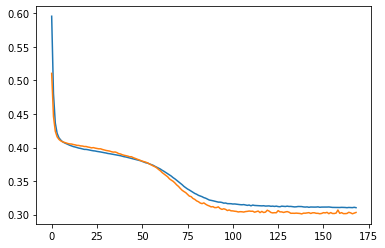

In [123]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [124]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [126]:
# 이미지를 위한 딥러닝
# 은닉층이 있는 인공신경망 = 딥러닝

test_input.shape

(10000, 28, 28)

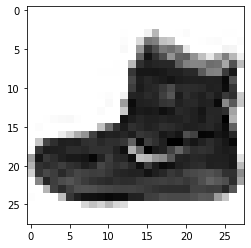

In [129]:
# 0에 가까울수록 검은색, 255에 가까울수록 흰색

plt.imshow(train_input[0], cmap='gray_r')

In [131]:
train_scaled = train_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

In [132]:
np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [134]:
# 훈련데이터, 검증데이터, 시험데이터

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

# 이미지를 위한 딥러닝
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

hist = model.fit(train_scaled, train_target, epochs = 30, validation_data=(val_scaled, val_target))

Epoch 1/30
1200/1200 [==============================] - 6s 4ms/step - loss: 0.5569 - accuracy: 0.8056 - val_loss: 0.4852 - val_accuracy: 0.8210
Epoch 2/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.4078 - accuracy: 0.8553 - val_loss: 0.3746 - val_accuracy: 0.8639
Epoch 3/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.3617 - accuracy: 0.8698 - val_loss: 0.3626 - val_accuracy: 0.8707
Epoch 4/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3392 - accuracy: 0.8779 - val_loss: 0.3586 - val_accuracy: 0.8697
Epoch 5/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.3213 - accuracy: 0.8865 - val_loss: 0.4096 - val_accuracy: 0.8675
Epoch 6/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3099 - accuracy: 0.8895 - val_loss: 0.3383 - val_accuracy: 0.8832
Epoch 7/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.2957 - accuracy: 0.8962 - val_loss: 0.3895 - val_accuracy:

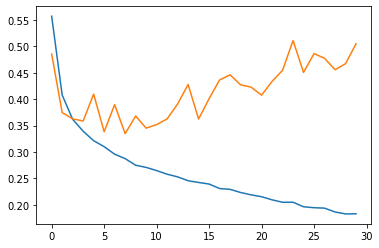

In [135]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [140]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', padding='same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2)) # 2배로 줄이겠다.

model.add(keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 2배로 줄이겠다.

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation = 'softmax'))

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

hist = model.fit(train_scaled, train_target, epochs = 30, validation_data=(val_scaled, val_target),
                 callbacks = [es])

Epoch 1/30
1500/1500 [==============================] - 69s 46ms/step - loss: 0.4498 - accuracy: 0.8386 - val_loss: 0.3192 - val_accuracy: 0.8852
Epoch 2/30
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2925 - accuracy: 0.8956 - val_loss: 0.2690 - val_accuracy: 0.9022
Epoch 3/30
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2577 - accuracy: 0.9103 - val_loss: 0.2614 - val_accuracy: 0.9071
Epoch 4/30
1500/1500 [==============================] - 67s 44ms/step - loss: 0.2385 - accuracy: 0.9164 - val_loss: 0.2541 - val_accuracy: 0.9128
Epoch 5/30
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2296 - accuracy: 0.9211 - val_loss: 0.2646 - val_accuracy: 0.9119
Epoch 6/30
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2280 - accuracy: 0.9215 - val_loss: 0.2715 - val_accuracy: 0.9082
Epoch 7/30
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2272 - accuracy: 0.9219 - val_loss: 0.2636 -